<a href="https://colab.research.google.com/github/0x416C657852/DiceClassificationCNN/blob/main/DiceClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import os
import cv2
from keras.optimizers import Adam
import pandas
%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#drag and drop the diceZip.zip file into the files section. this brings
#loadtimes from 75 minutes for the first epoch to 10 minutes
#and all further epochs fro15 8 minutes to 10

Mounted at /content/drive


In [ ]:
!unzip diceZip -d diceData

Archive:  diceZip.zip
replace diceData/dice/readme.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_path = 'diceData/dice/train'
val_path = 'diceData/dice/valid'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path, target_size=(480,480), classes=['d10', 'd12','d20','d4','d6','d8'], batch_size=64)

Found 14284 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.


In [ ]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

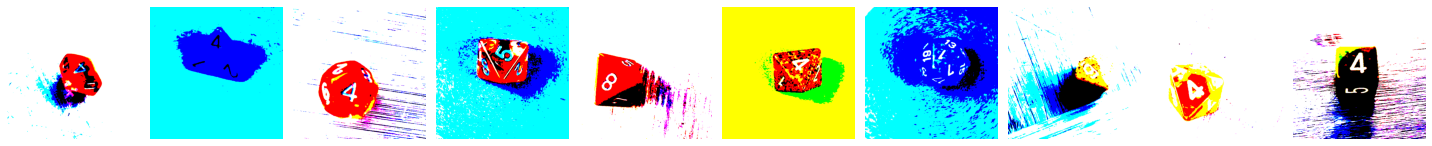

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0.

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(480,480,3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 480, 480, 32)      896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 480, 480, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 240, 240, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 240, 240, 64)      18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 240, 240, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 120, 120, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 921600)           

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=1
)

Epoch 1/10
224/224 [==============================] - 236s 1s/step - loss: 53.6567 - accuracy: 0.5319 - val_loss: 0.7954 - val_accuracy: 0.9467
Epoch 2/10
224/224 [==============================] - 243s 1s/step - loss: 0.0445 - accuracy: 0.9929 - val_loss: 0.9851 - val_accuracy: 0.9638
Epoch 3/10
224/224 [==============================] - 243s 1s/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 1.0686 - val_accuracy: 0.9681
Epoch 4/10
224/224 [==============================] - 244s 1s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1531 - val_accuracy: 0.9667
Epoch 5/10
224/224 [==============================] - 243s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2298 - val_accuracy: 0.9681
Epoch 6/10
224/224 [==============================] - 244s 1s/step - loss: 7.1506e-04 - accuracy: 1.0000 - val_loss: 1.2929 - val_accuracy: 0.9662
Epoch 7/10
224/224 [==============================] - 244s 1s/step - loss: 5.0757e-04 - accuracy: 1.0000 - val_loss: 1.3170 - val_accurac

In [ ]:
score = model.evaluate(valid_batches, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9047884345054626
Test accuracy: 0.9624167680740356


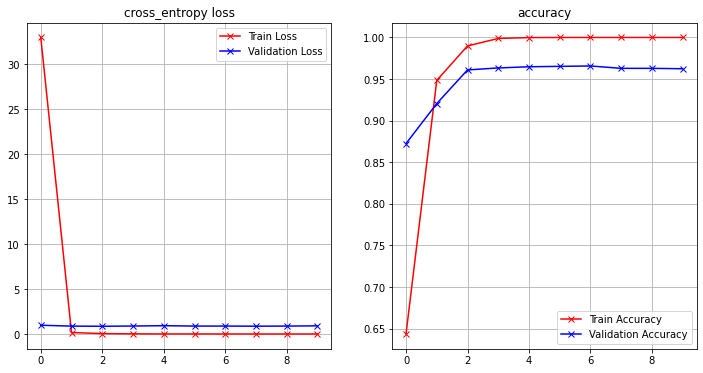

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)